<a href="https://colab.research.google.com/github/Amey-CK/Linear_Regression/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 6


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [3]:
df = pd.read_fwf("brain_body.txt")

In [4]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [6]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


OUTLIERS-


In [7]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


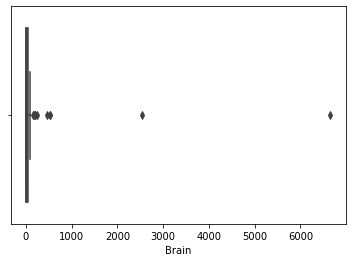

In [8]:
sns.boxplot(df.Brain)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


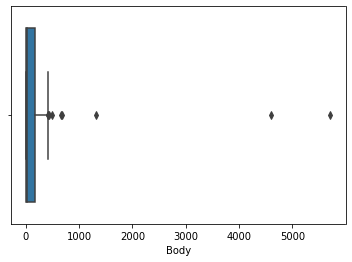

In [9]:
sns.boxplot(df.Body)

In [10]:
Brain_iqr = np.percentile(df.Brain,75) - np.percentile(df.Brain,25)
Body_iqr  = np.percentile(df.Body,75)  - np.percentile(df.Body,25)

In [11]:
upper_limit_Brain = df.Brain.quantile(0.75) +1.5*Brain_iqr
upper_limit_Body = df.Body.quantile(0.75) +1.5*Body_iqr

lower limit is negative so we will consider only upper limit and lower limit will be the minimum value.

In [12]:
df.Brain= df.Brain.clip(min(df.Brain), upper_limit_Brain)
df.Body =df.Body.clip(min(df.Body),upper_limit_Body)

Text(0.5, 1.0, 'Body vs Brain')

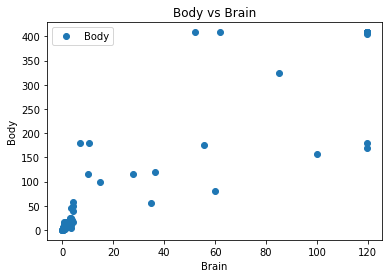

In [13]:
df.plot(x='Brain',y='Body',style='o')
plt.ylabel('Body')
plt.title('Body vs Brain')

In [14]:
df.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


correlation is 0.8 so no transformation required.

##Splitting the data


In [18]:
from sklearn.model_selection import train_test_split
x=df.loc[:,['Brain']].values
y=df.loc[:,['Body']].values
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

##Modelling


In [19]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
c=(regressor.intercept_)

In [28]:
m=regressor.coef_

Equation is - Body = 2.81164732*Brain + 18.97886064


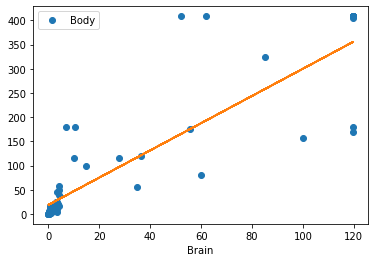

In [30]:
p=df.plot(x='Brain',y='Body',style='o')
p.plot(x,m*x+c)

In [32]:
y_pred = regressor.predict(x_test)

In [34]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.7902258492692151

R2 score is 0.79 which is a good R2 score